Notation: $y_{i}$ is a scalar, and $x_{i}$ is a $K\times1$ vector. $Y$
is an $n\times 1$ vector, and $X$ is an $n\times K$ matrix.

Algebra of Least Squares
========================

In [1]:
%matplotlib inline

OLS estimator
-------------

As we have learned from the linear project model, the parameter $\beta$
$$\begin{aligned}
y_{i} & =  x'_{i}\beta+e_{i}\\
E[x_{i}e_{i}] & =  0\end{aligned}$$ can be written as
$\beta=\left(E\left[x_{i}x_{i}'\right]\right)^{-1}E\left[x_{i}y_{i}\right].$

While population is something imaginary, in reality we possess a sample
of $n$ observations. We thus replace the population mean
$E\left[\cdot\right]$ by the sample mean, and the resulting estimator is
$$\widehat{\beta}=\left(\frac{1}{n}\sum_{i=1}^{n}x_{i}x_{i}'\right)^{-1}\frac{1}{n}\sum_{i=1}^{n}x_{i}y_{i}=\left(X'X\right)^{-1}X'y.$$
This is one way to motivate the OLS estimator.

Below is an example of OLS estimation

In [2]:
import numpy as np

n = 100
b0 = np.matrix([[1.0],[0.5]])

e = np.random.normal(size = (n,1))
X = np.hstack((np.ones((n, 1)), np.random.normal(size = (n, 1))))
y = np.dot(X, b0) + e

In [3]:
import statsmodels.api as sm

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     25.16
Date:                Sat, 07 Sep 2019   Prob (F-statistic):           2.35e-06
Time:                        00:00:10   Log-Likelihood:                -145.23
No. Observations:                 100   AIC:                             294.5
Df Residuals:                      98   BIC:                             299.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2835      0.105     12.277      0.0

In [4]:
bhat = np.dot(np.linalg.inv( X.T @ X ), X.T @ y ) 
print(bhat)

[[1.28354196]
 [0.45129143]]


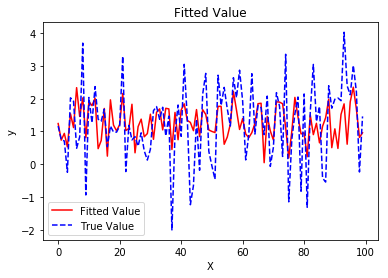

In [5]:
import matplotlib.pyplot as plt

plt.plot(results.fittedvalues, color = 'red', label = 'Fitted Value')
plt.plot(y, color = 'blue', linestyle = 'dashed', label = 'True Value')
plt.title('Fitted Value')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Here we introduce some definitions and properties in OLS estimation.

-   Fitted value: $\widehat{Y}=X\widehat{\beta}$.

-   Projector: $P_{X}=X\left(X'X\right)^{-1}X$; Annihilator:
    $M_{X}=I_{n}-P_{X}$.

-   $P_{X}M_{X}=M_{X}P_{X}=0$.

-   If $AA=A$, we call it an idempotent matrix. Both $P_{X}$ and $M_{X}$
    are idempotent.

-   Residual:
    $\widehat{e}=Y-\widehat{Y}=Y-X\widehat{\beta}=M_{X}Y=M_{X}\left(X\beta+e\right)=M_{X}e$.

-   $X'\widehat{e}=XM_{X}e=0$.

-   $\frac{1}{n}\sum_{i=1}^{n}\widehat{e}_{i}=0$ if $x_{i}$ contains a
    constant.

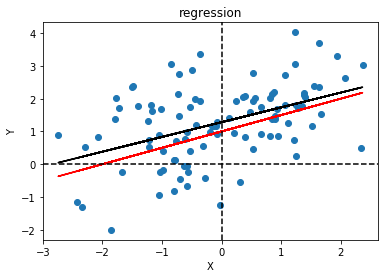

In [6]:
plt.plot(X[:, 1], y, 'o')
plt.plot(X[:, 1], X @ b0, color='red', linestyle='-')
plt.plot(X[:, 1], X @ bhat, color='black', linestyle='-')
plt.title('regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.axhline(0, color = 'black', linestyle = 'dashed')
plt.axvline(0, color = 'black', linestyle = 'dashed')
plt.show()

In [7]:
# check the orthogonality of ehat and X1
ehat = y - X @ bhat
MX =  np.identity(n) - X @ np.linalg.inv( X.T @ X)  @ X.T
print( "Three formulae of e_hat = \n", np.hstack( (ehat, MX@e, MX@y) )[range(10),:], )
print( "\n \n X*e = \n", X.T @ ehat )

Three formulae of e_hat = 
 [[-0.07650994 -0.07650994 -0.07650994]
 [ 0.01419216  0.01419216  0.01419216]
 [-0.23098727 -0.23098727 -0.23098727]
 [-0.77383685 -0.77383685 -0.77383685]
 [ 0.48745615  0.48745615  0.48745615]
 [ 0.80382353  0.80382353  0.80382353]
 [-1.85065324 -1.85065324 -1.85065324]
 [-0.62262723 -0.62262723 -0.62262723]
 [ 1.67125426  1.67125426  1.67125426]
 [-1.74552965 -1.74552965 -1.74552965]]

 
 X*e = 
 [[-2.04281037e-14]
 [ 7.21644966e-15]]


In [8]:
print("residual mean = ", np.mean(ehat) )
print("error mean = ", np.mean(e) )

residual mean =  -2.331468351712829e-16
error mean =  0.2861479266226798


**Real Data Example**

We check the relationship between *health status* and three control variables: *the number of doctor visits*, *the number of children in the household*, and
*access to health care*. 

*The real data example in Python is to be added"


In [9]:
n = 30
b0 = np.matrix([[1.0],[0.5],[0.1],[0.5]])

e = np.random.normal(size = (n,1))
X = np.hstack((np.ones((n, 1)), np.random.normal(size = (n, 3))))
y = np.dot(X, b0) + e


X2 = X[:,0:2]
PX2 = X2 @ np.linalg.inv( X2.T @ X2) @ X2.T
MX2 = np.identity(n) - PX2

X3 = X[:,2:4]


bhat3 =  np.linalg.inv( X3.T@ MX2 @ X3 ) @ (X3.T @ MX2 @ y)
print(bhat3)

bhat =  np.linalg.inv( X.T@ X ) @ (X.T @ y)
print(bhat)

[[0.48769234]
 [0.81792837]]
[[0.57625123]
 [1.04654702]
 [0.48769234]
 [0.81792837]]


Heteroskedasticity

Text(0,0.5,'e')

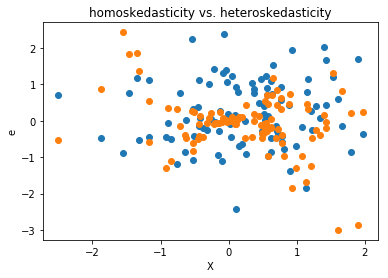

In [10]:
n = 100
x =  np.random.normal(size = (n, 1))

e1 =  np.random.normal(size = (n, 1) )
plt.plot( x, e1, 'o' )

e2 = x * np.random.normal(size = (n, 1) )
plt.plot( x, e2, 'o')

plt.title('homoskedasticity vs. heteroskedasticity')
plt.xlabel('X')
plt.ylabel('e')